<a href="https://colab.research.google.com/github/sarahrandolphw/edu4VA/blob/jasmine's-branch/gaming_and_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to download the dataset from kaggle to the notebook
# Need to download kaggle.json on kaggle settings, then upload in files your kaggle.json file


In [1]:
import os
import shutil

kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
shutil.move('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [2]:
import os
import zipfile

data_link = "learnplatform-covid19-impact-on-digital-learning"
data_folder = "learning_data"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

!kaggle competitions download -c {data_link} -p {data_folder}

for file in os.listdir(data_folder):
    if file.endswith('.zip'):
        zip_path = os.path.join(data_folder, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_folder)
        os.remove(zip_path)
print("Dataset downloaded and extracted to", data_folder)

data_files = os.listdir(data_folder)
print("Extracted files:", data_files)


 92% 114M/124M [00:01<00:00, 120MB/s] 
100% 124M/124M [00:01<00:00, 112MB/s]
Dataset downloaded and extracted to learning_data
Extracted files: ['README.md', 'districts_info.csv', 'products_info.csv', 'engagement_data']


In [3]:
import pandas as pd

districts_path = os.path.join(data_folder, 'districts_info.csv')
districts_info_df = pd.read_csv(districts_path)
districts_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [4]:
products_path = os.path.join(data_folder, 'products_info.csv')
products_info_df = pd.read_csv(products_path)
products_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [5]:
engagements_path = os.path.join(data_folder, 'engagement_data')
for filename in os.listdir(engagements_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(engagements_path, filename)

        new_data = pd.read_csv(file_path)

        if 'lp_id' in new_data.columns:
          products_merged_df = pd.merge(products_info_df, new_data, left_on='LP ID', right_on='lp_id', how='left')

products_merged_df.drop('lp_id', axis=1, inplace=True)
products_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45351 entries, 0 to 45350
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LP ID                       45351 non-null  int64  
 1   URL                         45351 non-null  object 
 2   Product Name                45351 non-null  object 
 3   Provider/Company Name       45350 non-null  object 
 4   Sector(s)                   43626 non-null  object 
 5   Primary Essential Function  43626 non-null  object 
 6   time                        45336 non-null  object 
 7   pct_access                  45336 non-null  float64
 8   engagement_index            31699 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [6]:
products_merged_df['engagement_index'].value_counts()

,count
engagement_index,
0.48,1857
0.96,954
0.63,732
1.91,569
2.39,414
...,...
309.75,1
183.56,1
224.83,1


<Axes: xlabel='time', ylabel='engagement_index'>

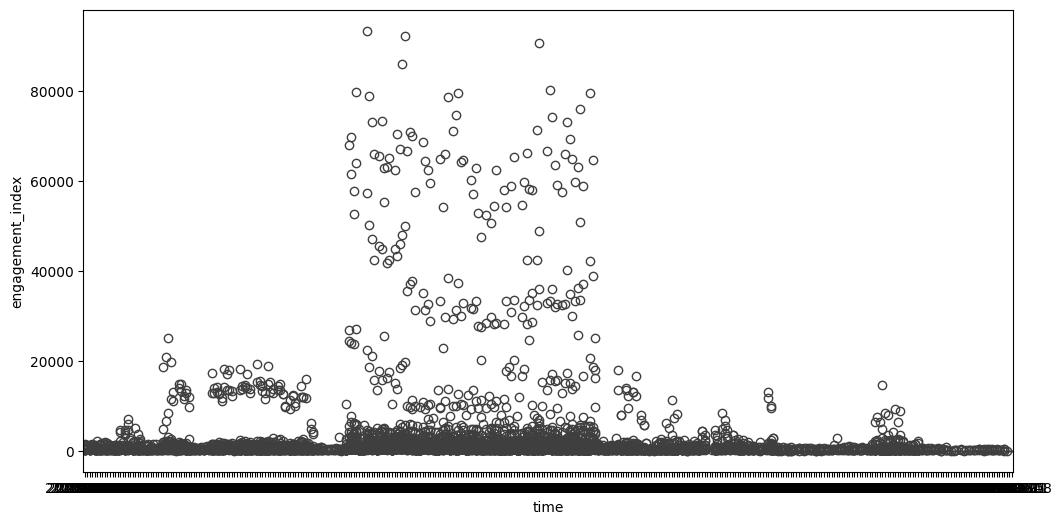

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=products_merged_df, x='time', y='engagement_index')

In [8]:
import os
import pandas as pd

# define paths
data_folder = "learning_data"
districts_path = os.path.join(data_folder, 'districts_info.csv')
products_path = os.path.join(data_folder, 'products_info.csv')
engagements_path = os.path.join(data_folder, 'engagement_data')

# load data
districts_df = pd.read_csv(districts_path)
products_df = pd.read_csv(products_path)

# ensure consistent data types for merging
districts_df['district_id'] = districts_df['district_id'].astype(str)

# process engagement data
engagement_list = []
for file in os.listdir(engagements_path):
    if file.endswith('.csv'):
        district_id = file.split('.')[0]  # extract district_id from filename
        engagement_df = pd.read_csv(os.path.join(engagements_path, file))
        engagement_df['district_id'] = district_id  # add district_id
        engagement_list.append(engagement_df)

# combine all engagement files
engagement_df = pd.concat(engagement_list, ignore_index=True)
engagement_df['district_id'] = engagement_df['district_id'].astype(str)

# merge products with engagement data
products_engagement_df = pd.merge(
    products_df,
    engagement_df,
    left_on='LP ID',
    right_on='lp_id',
    how='inner'
)

# merge districts with the combined data
final_df = pd.merge(
    districts_df,
    products_engagement_df,
    on='district_id',
    how='inner'
)

# display the final DataFrame information
print(final_df.info())
print(final_df.head())

# save to a CSV file
final_df.to_csv(os.path.join(data_folder, 'merged_data.csv'), index=False)
print("Merged data saved to 'merged_data.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691587 entries, 0 to 11691586
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   district_id                 object 
 1   state                       object 
 2   locale                      object 
 3   pct_black/hispanic          object 
 4   pct_free/reduced            object 
 5   county_connections_ratio    object 
 6   pp_total_raw                object 
 7   LP ID                       int64  
 8   URL                         object 
 9   Product Name                object 
 10  Provider/Company Name       object 
 11  Sector(s)                   object 
 12  Primary Essential Function  object 
 13  time                        object 
 14  lp_id                       float64
 15  pct_access                  float64
 16  engagement_index            float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.5+ GB
None
  district_id     state  locale pct_bl

NEW CODE!!! Using demographic and socioeconomic data, predict which gamified tool would work best for each district.


In [20]:
# Load merged data
merged_data_path = "learning_data/merged_data.csv"
df = pd.read_csv(merged_data_path)
print("Data Loaded Successfully")

# Fill missing values
df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
df.fillna('Unknown', inplace=True)  # Replace remaining NaNs with 'Unknown'
print("Missing Values Handled")

# Encode categorical variables
categorical_cols = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
                    'county_connections_ratio', 'pp_total_raw', 'Primary Essential Function']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print("Categorical Columns Encoded")

# Reduce target cardinality by grouping rare classes
threshold = 500  # Minimum number of samples per class
class_counts = df['Primary Essential Function'].value_counts()
rare_classes = class_counts[class_counts < threshold].index

df['Primary Essential Function'] = df['Primary Essential Function'].replace(rare_classes, 'Other')
print("Reduced Target Cardinality:", df['Primary Essential Function'].value_counts())

# Define features and target variable
features = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
            'county_connections_ratio', 'pp_total_raw']
target = 'Primary Essential Function'

X = df[features]
y = df[target]
print("Features and Target Defined")


<ipython-input-20-fcaeef502761>:3: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_data_path)


Data Loaded Successfully


<ipython-input-20-fcaeef502761>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
<ipython-input-20-fcaeef502761>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)  # Replace remaining NaNs with 'Unknown'


Missing Values Handled
Categorical Columns Encoded
Reduced Target Cardinality: Primary Essential Function
10    2250979
12    1426204
8     1151412
19     875803
23     730350
15     614726
35     503804
9      449155
13     432836
16     405237
6      243373
20     224058
1      209919
26     199242
17     186378
31     176122
14     171870
2      153911
11     149599
0      130799
29     118080
7      115972
4      115943
25     108309
18      95024
21      92904
34      77439
30      63707
5       51824
27      47502
22      28283
3       23444
33      23260
32      17209
28      14453
24      12457
Name: count, dtype: int64
Features and Target Defined


In [21]:
from sklearn.model_selection import train_test_split

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Data Split into Training and Test Sets")


Data Split into Training and Test Sets


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
rf_classifier.fit(X_train, y_train)
print("Random Forest Model Trained")


Random Forest Model Trained


Accuracy: 0.005657342870673136
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     39240
           1       0.00      0.00      0.00     62976
           2       0.02      0.01      0.01     46173
           3       0.00      0.13      0.01      7033
           4       0.00      0.00      0.00     34783
           5       0.01      0.01      0.01     15547
           6       0.03      0.02      0.03     73012
           7       0.02      0.10      0.03     34792
           8       0.00      0.00      0.00    345424
           9       0.00      0.00      0.00    134746
          10       0.00      0.00      0.00    675294
          11       0.04      0.00      0.00     44880
          12       0.00      0.00      0.00    427861
          13       0.00      0.00      0.00    129851
          14       0.00      0.00      0.00     51561
          15       0.00      0.00      0.00    184418
          16       0.05   

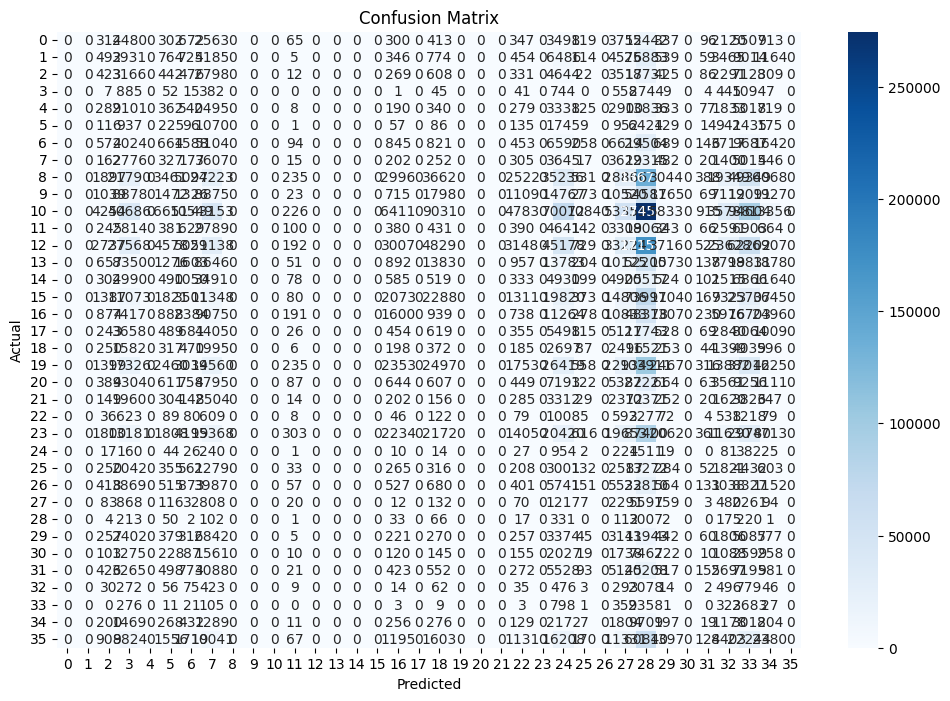

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


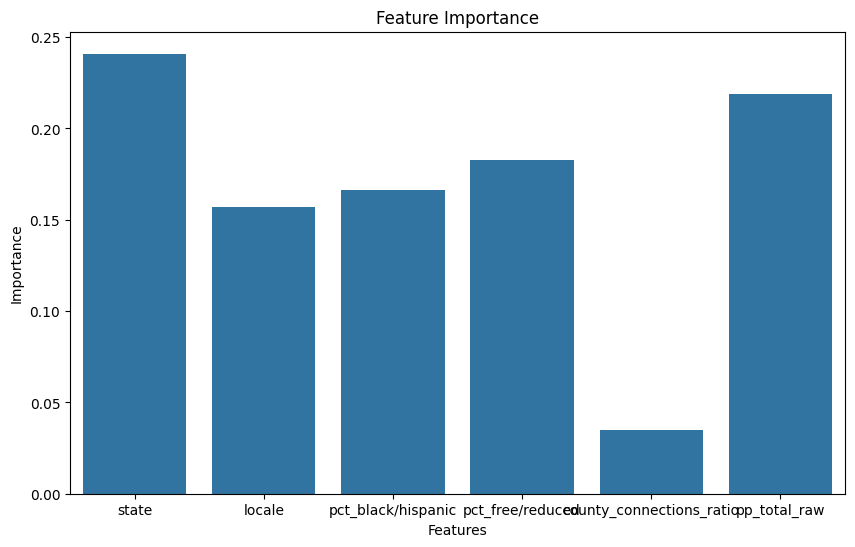

In [24]:
# Plot feature importance
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params")

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned, zero_division=0))


SyntaxError: unterminated string literal (detected at line 20) (<ipython-input-25-120c5d83822f>, line 20)